**Kindly comment if you find any mistake and give addvice as it will be a great honour to learn from you.**  

Below i have imported all the library that we will need in this kernel.
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;****numpy****-for numerical operation
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**panda**-for data wrangling 
&emsp;&emsp;&emsp;&emsp;&emsp;**matplotlib and seaborn**-for data visualisation
&emsp;&emsp;&emsp;&emsp;&emsp;**sklearn**-to apply machine learning algorithm

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by t|he kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.


['heart.csv']


****Reading the data through pandas****


In [2]:
df=pd.read_csv("../input/heart.csv")

****Observing the data****

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.index

RangeIndex(start=0, stop=303, step=1)

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

****There is no missing data in the database****

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Observing the target as it is the output column which shows us if the patients had the heart dieases or not.here we are observing target values and we can observe that we have more people with cases having heart dieases then people not having heart dieases in our data.**

Text(0.5, 1.0, 'Target values')

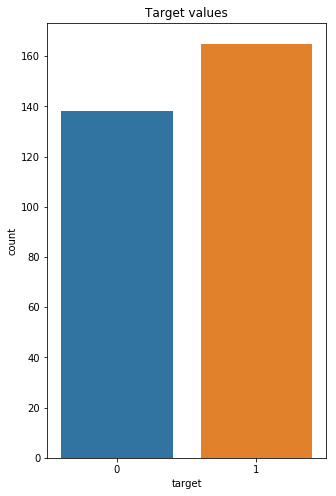

In [9]:
fig, ax = plt.subplots(figsize=(5, 8))
sns.countplot(df['target'])
plt.title('Target values')

**Now lets see how many male and female in our data**

Text(0.5, 1.0, 'male and female distribution')

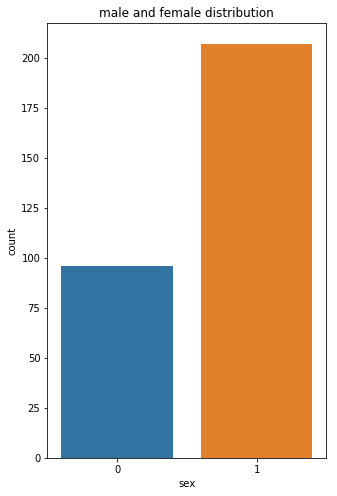

In [10]:
fig, ax = plt.subplots(figsize=(5, 8))
sns.countplot(df['sex'])
plt.title('male and female distribution')

**Now below i have shown distribution of age over database.**

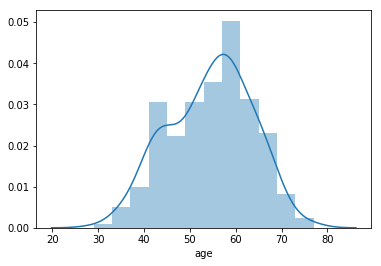

In [11]:
sns.distplot(df['age'])




**Below i have shown the relation between age and oldpeak as the jointplot.**

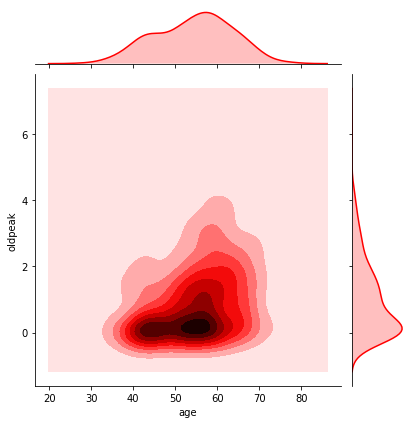

In [12]:
sns.jointplot(x = 'age', y = 'oldpeak', kind = 'kde', color = 'red', data = df)


here we are observing the bar plot with the belive that different type of chest pain causes different type of targets in male and female.
we can see that cp type 4 is more responsible in female while chest pain type 2 is more responsible in male. 

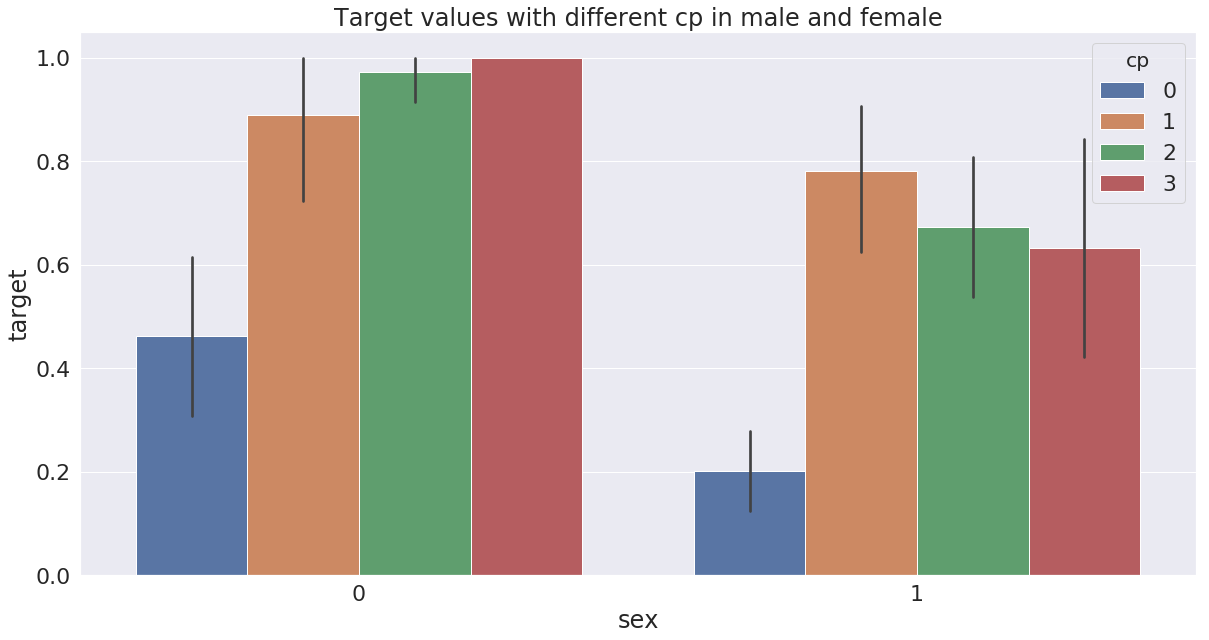

In [13]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('Target values with different cp in male and female')
sns.barplot(x='sex',y='target',hue='cp',data=df)


**Below i have shown a plot by samoling the age feature in some parts to observe the effect of excersize on the maximum heart rate achieved in different agegroup.
we can see that here the maximum heart beat decreases as the age increases but it further decreases as the patient has excersize induced angina. by this we can say that by achieving lower maximum heart beat we can predict and save ourselves from excersize induced angina.**

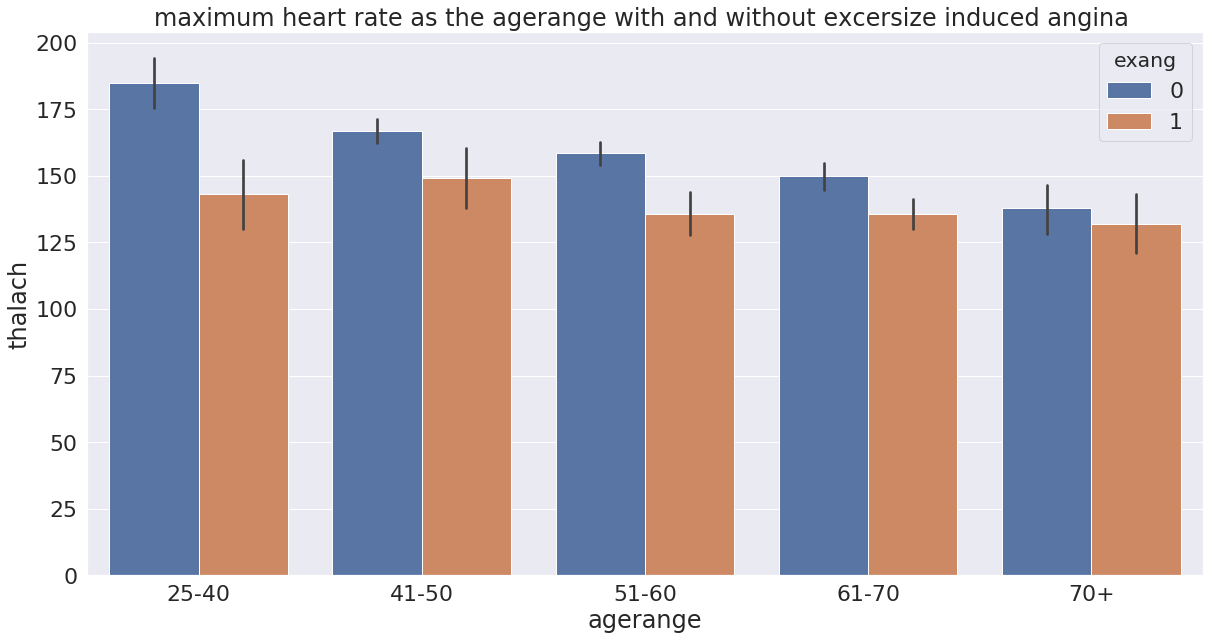

In [14]:
ages=['age']
bins = [29,35,45,55,65,77]
labels = [ '25-40','41-50', '51-60', '61-70', '70+']
df['agerange'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('maximum heart rate as the agerange with and without excersize induced angina ')
sns.barplot(x='agerange',y='thalach',hue='exang',data=df)

**Below a i have shown a correlation matrix to show if there is any corelelation between different features.and we can say that there is not any serious corelation between features.**

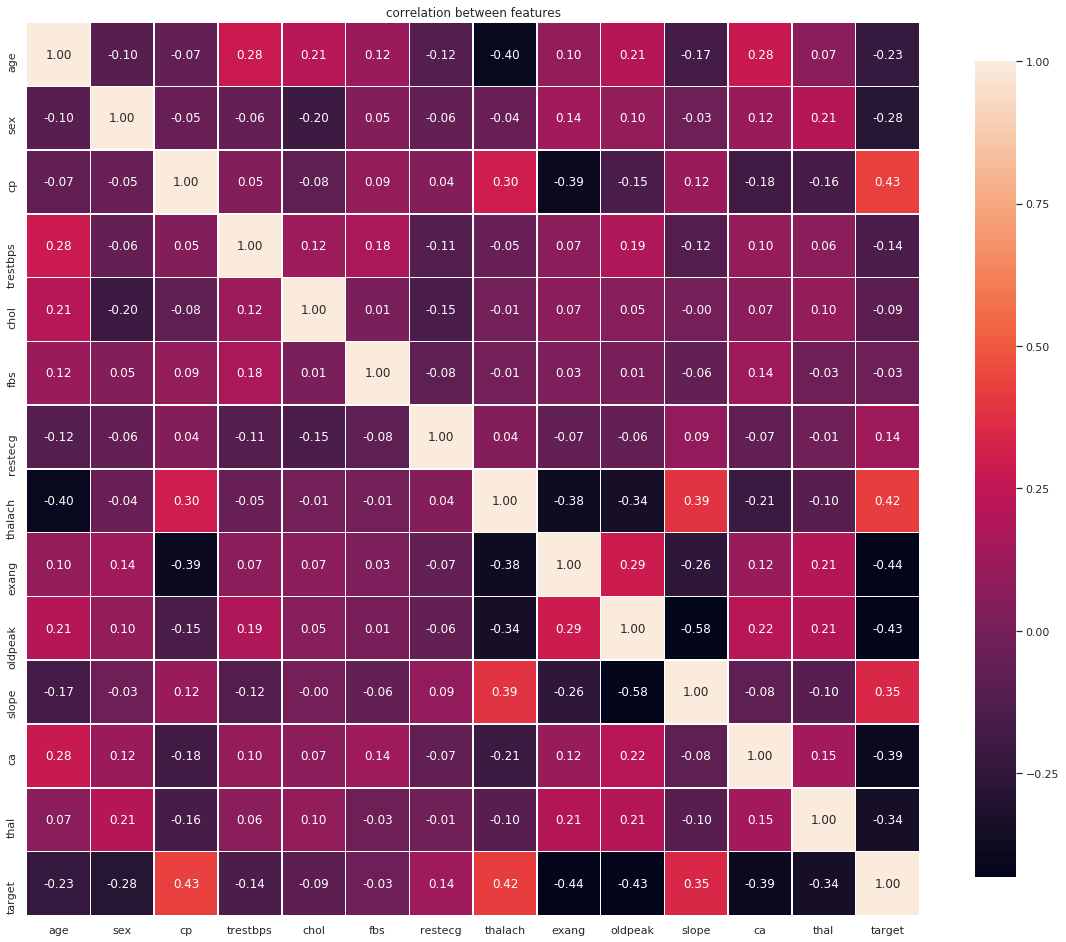

In [15]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(20, 20))
plt.title('correlation between features')
sns.heatmap(df.corr(), robust=True, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})

**Below i have shown the relation between age and cholestrol in men and women. we can say that as the age increases the change in cholestrol in women is more then the men.**

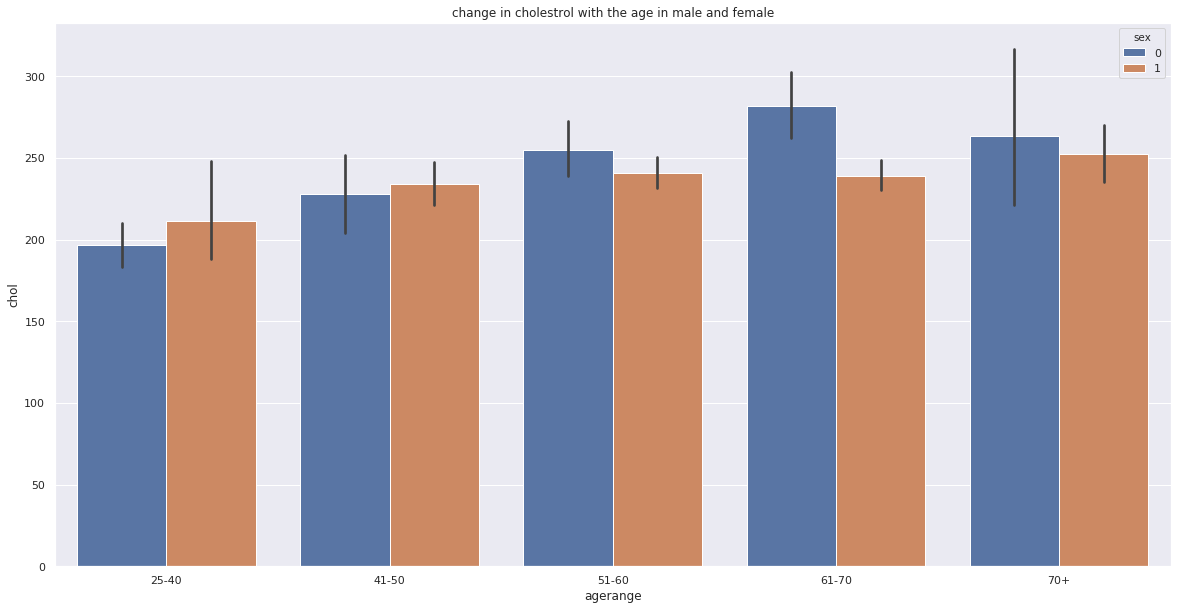

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('change in cholestrol with the age in male and female')
sns. barplot(x="agerange", y="chol",hue='sex' ,data=df)


**By below violin plot shows the distribution of cholestrol level over the different age levels. we can see that here the highest cholestrol level are found in the agerange of 55-64.mostly the cholestrol level increases with the increase in the age.also there is change in distribution in male and women.**

Text(0.5, 1.0, 'change in cholestrol with the age')

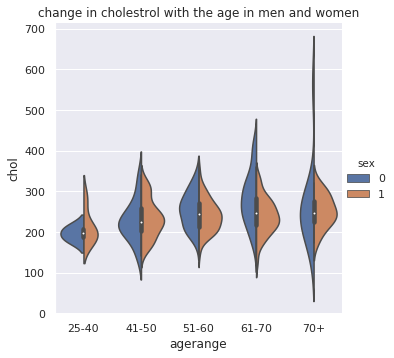

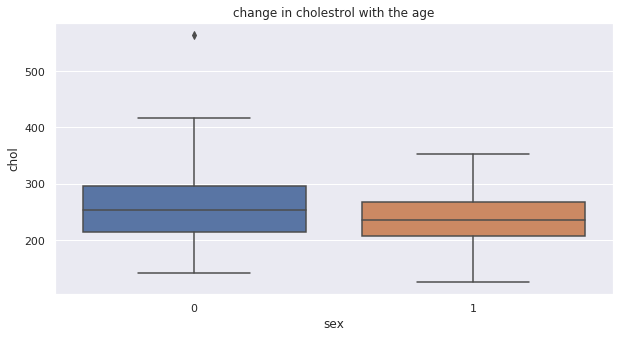

In [17]:
ax1=sns.catplot(x="agerange", y="chol",hue="sex",kind="violin",split=True,data=df)
plt.title('change in cholestrol with the age in men and women')
fig1, ax2 = plt.subplots(figsize=(10, 5))
ax2=sns.boxplot(x="sex", y="chol",data=df)
plt.title('change in cholestrol with the age')


**Now we will start applying machine learning.we would start with logistic regression**
    

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression


**Now droping the Tagret column as it the value that we want to predict from the input set. also we have dropped the agerange column which we created as the age column is included in the data. so there is no meaning of having another column with same feature.
Also we are splitting the data in test and train part.**

In [19]:
X=df.drop(columns=["target","agerange"],axis=1)
y=df['target']

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agerange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,61-70
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,41-50
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,61-70
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,61-70


**Now lets try different test size as it will have a great impact on accuracy of algorithm**

**Below i have taken different test size as a list
then i have applied logistic regression and i have printed accuracy score for different size of test set**


In [21]:
test_size=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
for i in test_size:
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=i)
  clf=LogisticRegression()
  clf.fit(X_train,y_train)
  clf.predict(X_test)
  accuracy=clf.score(X_test,y_test)
  print("accuracy for test size",i,"is",accuracy )

accuracy for test size 0.05 is 0.875
accuracy for test size 0.1 is 0.8064516129032258
accuracy for test size 0.15 is 0.8695652173913043
accuracy for test size 0.2 is 0.8688524590163934
accuracy for test size 0.25 is 0.7763157894736842
accuracy for test size 0.3 is 0.7362637362637363
accuracy for test size 0.35 is 0.8878504672897196
accuracy for test size 0.4 is 0.819672131147541
accuracy for test size 0.45 is 0.8321167883211679


In [22]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)
from sklearn.preprocessing import StandardScaler
# scale the train and test ages
df_num=['age', 'trestbps', 'chol','thalach', 'oldpeak']
scaler = StandardScaler()
X_train.age = scaler.fit_transform(X_train.age.values.reshape(-1,1))
X_test.age = scaler.transform(X_test.age.values.reshape(-1,1))
X_train.trestbps = scaler.fit_transform(X_train.trestbps.values.reshape(-1,1))
X_test.trestbps = scaler.transform(X_test.trestbps.values.reshape(-1,1))
X_train.chol = scaler.fit_transform(X_train.chol.values.reshape(-1,1))
X_test.chol = scaler.transform(X_test.chol.values.reshape(-1,1))
X_train.thalach = scaler.fit_transform(X_train.thalach.values.reshape(-1,1))
X_test.thalach = scaler.transform(X_test.thalach.values.reshape(-1,1))
X_train.oldpeak = scaler.fit_transform(X_train.oldpeak.values.reshape(-1,1))
X_test.oldpeak = scaler.transform(X_test.oldpeak.values.reshape(-1,1))


In [23]:
clf=LogisticRegression()
clf.fit(X_train,y_train)
clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print("accuracy with feauture scaling is",accuracy )


accuracy with feauture scaling is 0.7472527472527473


**Above we can see that as the test size decreases or we can say train size increases accuracy increases upto some point.but sometimes after that at less values of test set the model underfits as the no. of example increases for the same no. of feature. so we should select value of test size so that model doesnt underfit. here we should take test size around 0.15 and 0.20 so that the model doesnt underfit and gives best accuracy most of the time.**

**Now lets try neural network for classification**
Below i have imported library that are used in algorithm

In [24]:
import sklearn
import sklearn.datasets
from sklearn import preprocessing
df=pd.read_csv("../input/heart.csv")


In [25]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Below i have removed columns as mentioned above during logistic regression**

In [26]:
X=df.drop(['target'],axis=1)
Y=df.as_matrix(columns=['target'])
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[0]
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (303, 13)
The shape of Y is: (303, 1)
I have m = 303 training examples!


**Below i have defined a function which gives you the number of nodes in the layer of neural network.
i have taken the hidden layer nodes as 4 as per my previous experiences. you can any other values also**

In [27]:
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
from sklearn.preprocessing import StandardScaler
# scale the train and test ages
df_num=['age', 'trestbps', 'chol','thalach', 'oldpeak']
scaler = StandardScaler()
X_train.age = scaler.fit_transform(X_train.age.values.reshape(-1,1))
X_test.age = scaler.transform(X_test.age.values.reshape(-1,1))
X_train.trestbps = scaler.fit_transform(X_train.trestbps.values.reshape(-1,1))
X_test.trestbps = scaler.transform(X_test.trestbps.values.reshape(-1,1))
X_train.chol = scaler.fit_transform(X_train.chol.values.reshape(-1,1))
X_test.chol = scaler.transform(X_test.chol.values.reshape(-1,1))
X_train.thalach = scaler.fit_transform(X_train.thalach.values.reshape(-1,1))
X_test.thalach = scaler.transform(X_test.thalach.values.reshape(-1,1))
X_train.oldpeak = scaler.fit_transform(X_train.oldpeak.values.reshape(-1,1))
X_test.oldpeak = scaler.transform(X_test.oldpeak.values.reshape(-1,1))


In [28]:
X_train=X_train.T
print(X_train.shape)
Y_train=Y_train.T
print(Y_train.shape)
X_test=X_test.T
print(X_test.shape)
Y_test=Y_test.T
print(Y_test.shape)

(13, 227)
(1, 227)
(13, 76)
(1, 76)


In [29]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(13, 227)
(1, 227)
(13, 76)
(1, 76)


In [30]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [31]:
def layer_sizes(X, Y):
    
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

In [32]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

**Below i have defined a function to randomly initalize the parameter and and also saved that parameters so that they can be used during back propogation**

In [33]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

**Below i have made a function for forward propogation in neural network. I have loaded parameters from dictionery parameters and used the equation from the course that i have learned in deep learning. activation function for hidden layer is tanh function and that for the output layer is sigmoid function as this is the binary classification.**

In [34]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # number of example
    logprobs = (Y*np.log(A2))+((1-Y)*np.log(1-A2))
    cost = (-1/m)*np.sum(logprobs)
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
    return cost

In [35]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1= parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    dZ2 = A2-Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

**Below i have made a fuction to compute the cost. its equation is also taken from the course i have learnt in deep learning**

In [36]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    W1 = W1-(learning_rate*dW1)
    b1 = b1-(learning_rate*db1)
    W2 = W2-(learning_rate*dW2)
    b2 = b2-(learning_rate*db2)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

**Below i have created a function for backward propogation that will compute the gradients of the function**

In [37]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
  
        if print_cost and i % 100000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [38]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2>0.5)
    
    return predictions

**Below i have created function to update the parameters W,b as per their gradients dW,db computed in the last step**

In [39]:
parameters = nn_model(X_train, Y_train, n_h = 4, num_iterations = 1000000 , print_cost=True)


Cost after iteration 0: 0.693095
Cost after iteration 100000: nan
Cost after iteration 200000: nan
Cost after iteration 300000: nan
Cost after iteration 400000: nan
Cost after iteration 500000: nan
Cost after iteration 600000: nan
Cost after iteration 700000: nan
Cost after iteration 800000: nan
Cost after iteration 900000: nan


In [40]:
predictions = predict(parameters, X_test)
predictions

array([[False, False,  True, False,  True,  True,  True, False, False,
        False,  True, False, False, False,  True,  True,  True, False,
        False, False, False, False,  True, False,  True,  True, False,
         True, False,  True, False, False, False, False,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True, False, False, False, False,  True,  True,
        False, False, False,  True, False, False, False,  True,  True,
         True,  True, False, False,  True,  True, False,  True,  True,
        False,  True, False, False]])

In [41]:
print(predictions.shape)
print(Y_test.shape)

(1, 76)
(1, 76)


In [42]:
predictions = predict(parameters, X_test)
print ('Accuracy: %d' % float((np.dot(Y_test,predictions.T) + np.dot(1-(Y_test),1-predictions.T))/float(((Y_test)).size)*100) + '%')

Accuracy: 81%
